<a href="https://colab.research.google.com/github/artemmiyy/psu_quants/blob/main/Quant_Paper_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as plt
yf.pdr_override()

In [ ]:
y_symbols = ['AAPL']
startdate = datetime(2013,3,16)
AAPL = pdr.get_data_yahoo(y_symbols, start = startdate)

# loads Stock price data 
def loadStockData(tickerList,startDate):
  for ticker in tickerList: 
    tickerList[ticker] = pdr.get_data_yahoo(ticker, start = startdate)['Adj Close']
    pdr.get_data_yahoo()


In [6]:
y_symbols = ['AAPL']
startdate = datetime(2013,3,16)
AAPL = pdr.get_data_yahoo(y_symbols, start = startdate)

[*********************100%***********************]  1 of 1 completed


In [7]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500


In [8]:
AAPL['daily_return'] = (AAPL['Adj Close'] / (AAPL['Adj Close'].shift(1))) - 1

In [9]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,0.013266
2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,0.014089
2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,0.002621
2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,0.018694
2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98862500,-0.005454


<Axes: xlabel='Date'>

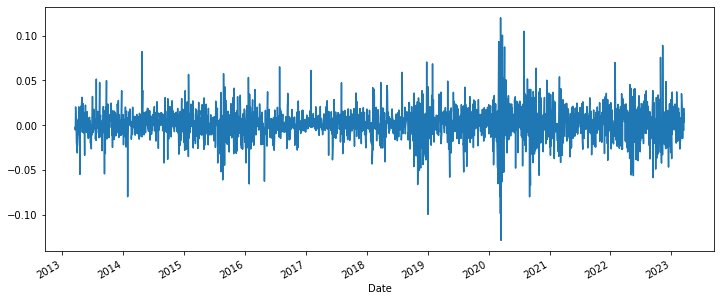

In [10]:
AAPL['daily_return'].plot(figsize = (12,5))

In [11]:
# calculating the average daily return
avg_daily_return = AAPL['daily_return'].mean()
avg_daily_return

0.0011174413705893613

In [12]:
avg_annual_return = avg_daily_return * 250
avg_annual_return

0.27936034264734033

In [13]:
print(str(round(avg_annual_return, 5) * 100) + '%')

27.936%


In [14]:
us_stocks = ['AAPL', 'BBW', 'EPD', 'MCD']

In [15]:
stocks_data = pd.DataFrame()
startdate = datetime(2013, 3, 16)
for ticker in us_stocks:
  stocks_data[ticker] = pdr.get_data_yahoo(ticker, start = startdate)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
stocks_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2013-03-18 to 2023-03-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2519 non-null   float64
 1   BBW     2519 non-null   float64
 2   EPD     2519 non-null   float64
 3   MCD     2519 non-null   float64
dtypes: float64(4)
memory usage: 98.4 KB


<Axes: xlabel='Date'>

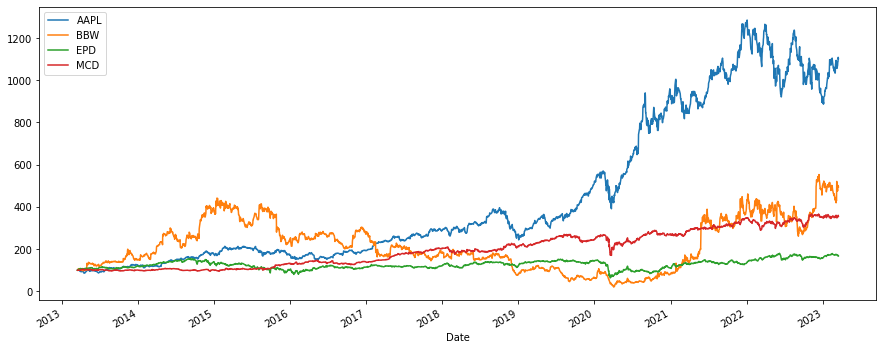

In [17]:
(stocks_data / stocks_data.iloc[0] * 100).plot(figsize = (15,6))

In [18]:
returns = (stocks_data / stocks_data.shift(1)) - 1
returns.head()

,AAPL,BBW,EPD,MCD
Date,,,,
2013-03-18,NaN,NaN,NaN,NaN
2013-03-19,-0.002699,0.013780,-0.000531,-0.001724
2013-03-20,-0.005303,0.015534,0.013473,0.003760
2013-03-21,0.001438,0.013384,0.015393,-0.002430
2013-03-22,0.020277,0.024528,0.013609,0.007511


In [19]:
# weights of the securities in our portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [20]:
np.dot(returns, weights)

array([        nan,  0.00220621,  0.00686603, ..., -0.00732461,
        0.01240092, -0.00929003])

In [28]:
# takes a dataframe with stock price data and a list with their respective weights
def calculate_expected_return(pd_df_us_stocks, weights):
  daily_returns = (pd_df_us_stocks / pd_df_us_stocks.shift(1)) - 1
  weights = np.array(weights)
  np.dot(daily_returns, weights)
  annual_portfolio_return = daily_returns.mean() * 250
  annual_portfolio_return = np.dot(annual_portfolio_return, weights)
  return annual_portfolio_return

In [29]:
calculate_expected_return(stocks_data, [0.25, 0.25, 0.25, 0.25])

0.2213261126091662

In [22]:
annual_portfolio_return = returns.mean() * 250

In [23]:
np.dot(annual_portfolio_return, weights)

0.2213261126091662

In [24]:
class Portfolio:
  def __init__(self, name, cash):
    self.expense_ratio = None
    self.cash = cash
    self.name = name
    self.us_stock_holdings = None
    self.expected_return = None
    self.portfolio_beta = None
    self.variance = None
    self.sharpe_ratio = None
  
  def add_us_stock(self, ticker, price, quantity):
    self.cash -= price * quantity
    
  def portfolio_report(self):
    print("PSU Quants {portfolio} Portfolio".format(portfolio = self.name))
    print("Assets Under Management: {aum}".format(aum = self.cash)) # add all assets later
    print("Cash on Hand: {cash}".format(cash = self.cash))
    print("Return as of {date}: {return_1}".format(date = "2020", return_1 = self.cash))

In [25]:
test_portfolio = Portfolio('PSU Quant Portfolio', 1000000)

In [26]:
test_portfolio.portfolio_report()

PSU Quants PSU Quant Portfolio Portfolio
Assets Under Management: 1000000
Cash on Hand: 1000000
Return as of 2020: 1000000
